# **Feedforward Propagation （前馈神经网路）**
接下来使用已经训练好的数据搭建神经网络进行手写数字识别的预测
下一个练习将会使用backpropagation algorithm（反向传播算法）训练神经网络

![alt text](../img/神经元二元运算符.png)

[注：图片源于《斯坦福大学2014机器学习教程个人笔记（V5.52）》
黄海广 
haiguang2000@qq.com 
]


通过这个图可以瞪眼法易知，神经网络可以弥补逻辑回归线性计算的不足（比如手写数字识别的数字在图片的相对位置等复杂情况）

要使用读取的神经网络权重信息搭建神经网络并进行预测，需要以下步骤：

### 1. 读取权重文件
首先，使用 `scipy.io.loadmat` 读取 `.mat` 文件中的权重信息。


In [1]:
import scipy.io

# 加载权重文件
weights = scipy.io.loadmat('ex3weights.mat')
data = scipy.io.loadmat('ex3data1.mat')

# 提取权重
Theta1 = weights['Theta1']  # 输入层到隐藏层的权重
Theta2 = weights['Theta2']  # 隐藏层到输出层的权重

### 2. 搭建神经网络
这是一个简单的2层神经网络（输入层、隐藏层、输出层），使用Sigmoid激活函数。


In [2]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(Theta1, Theta2, X):
    # 添加偏置单元
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    # 隐藏层计算
    a2 = sigmoid(X @ Theta1.T)
    
    # 添加隐藏层的偏置单元
    a2 = np.hstack([np.ones((a2.shape[0], 1)), a2])
    
    # 输出层计算
    a3 = sigmoid(a2 @ Theta2.T)
    
    # 返回预测结果（概率最大的类别）
    return np.argmax(a3, axis=1) + 1  # 类别从1开始


### 3. 准备输入数据
假设输入数据 `X` 是一个形状为 `(m, n)` 的矩阵，其中 `m` 是样本数，`n` 是特征数。确保 `X` 已经标准化或预处理过。


In [3]:
X = data['X']  # 输入特征
random_indices = np.random.choice(X.shape[0], 5, replace=False)
X_sample = X[random_indices, :]  # 随机选择100个样本
print("随机选择的样本：", random_indices)
X_sample

随机选择的样本： [3820 2158 1588 1901 2867]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

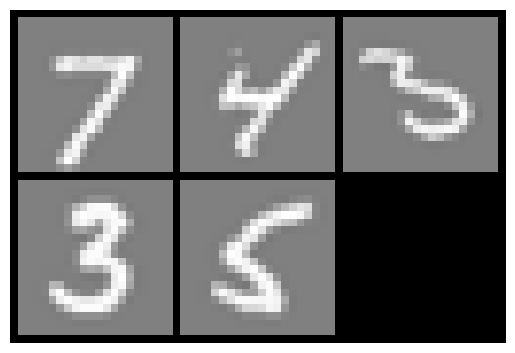

In [4]:
#绘制抽中的样本
import matplotlib.pyplot as plt
def display_data(X):
    m, n = X.shape # m是样本数，n是特征数
    example_width = int(np.round(np.sqrt(n))) # 假设每个样本是一个正方形
    example_height = n // example_width # 每个样本的高度  //（floor division)是向下取整
    display_rows = int(np.floor(np.sqrt(m))) # 显示的行数, floor是向下取整
    display_cols = int(np.ceil(m / display_rows)) # 显示的列数, ceil是向上取整
    
    pad = 1 # 每个样本之间的间隔, 1个像素, 黑框
    display_array = -np.ones((pad + display_rows * (example_height + pad), 
                              pad + display_cols * (example_width + pad)))
    
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex >= m:
                break
            max_val = np.max(np.abs(X[curr_ex, :]))
            row_start = pad + j * (example_height + pad)
            col_start = pad + i * (example_width + pad)
            display_array[row_start:row_start + example_height, 
                          col_start:col_start + example_width] = \
                X[curr_ex, :].reshape(example_height, example_width).T / max_val
            curr_ex += 1
    
    plt.imshow(display_array, cmap='gray')
    plt.axis('off')
    plt.show()
display_data(X_sample)


### 4. 进行预测
调用 `predict` 函数进行预测。


In [5]:
predictions = predict(Theta1, Theta2, X_sample)
y = data['y']
for i in range(len(random_indices)):
    print(f"样本索引: {random_indices[i]}, 预测类别: {predictions[i]}, 真实类别: {y[random_indices[i]][0]}")

样本索引: 3820, 预测类别: 7, 真实类别: 7
样本索引: 2158, 预测类别: 4, 真实类别: 4
样本索引: 1588, 预测类别: 6, 真实类别: 3
样本索引: 1901, 预测类别: 3, 真实类别: 3
样本索引: 2867, 预测类别: 5, 真实类别: 5



### 5. 注意事项
1. **输入数据预处理**：确保输入数据 `X` 已经标准化（与训练数据一致）。
2. **权重维度**：检查 `Theta1` 和 `Theta2` 的维度是否与网络结构匹配。
   - `Theta1` 的形状应为 `(hidden_units, input_units + 1)`。
   - `Theta2` 的形状应为 `(output_units, hidden_units + 1)`。
3. **类别编号**：预测结果的类别从1开始（如1到10）。

如果有其他需求（如可视化、性能评估等），可以进一步扩展代码。

# 6.  计算准确率


In [6]:
# 计算准确率
pre = predict(Theta1, Theta2, X)
y = data['y']
count = 0
for i in range(len(y)):
    if pre[i] == y[i]:
        count+=1
accuracy = count / len(y)
print("准确率为：", accuracy)

准确率为： 0.9752


![Screenshot 2025-08-09 151327.png](<attachment:Screenshot 2025-08-09 151327.png>)
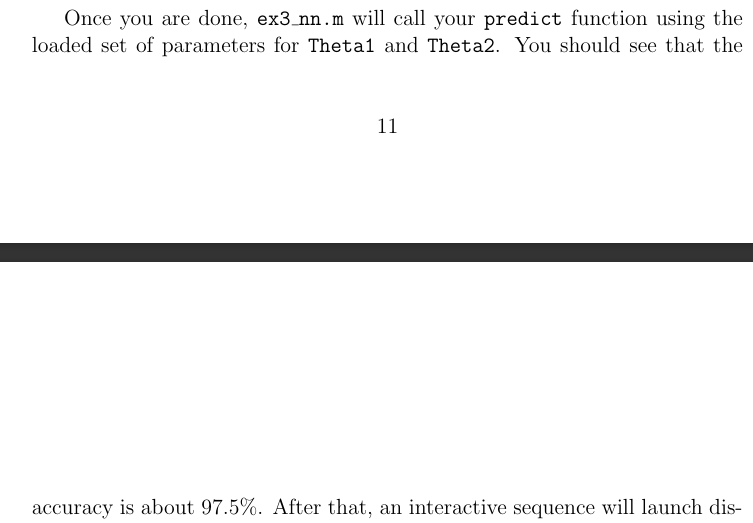